In [2]:
import requests
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mplfinance as mpl

from cdc_wrapper import CDC

In [3]:
base_url = 'https://api.alternative.me/'
endpoint = 'fng/'
limit = 365

request = f'{base_url}{endpoint}?limit={limit}&format=json&date_format=cn'

# request = 'https://api.alternative.me/fng/?limit=10&format=csv&date_format=cn'

response = requests.get(request).json()
fng_data = response['data']
# temp = response.replace('\"', '\'')



fng_df = pd.DataFrame.from_records(fng_data)
fng_df['date'] = pd.to_datetime(fng_df['timestamp'])
fng_df = fng_df.drop(columns=['time_until_update', 'timestamp'])

fng_df['value'] = pd.to_numeric(fng_df['value'])


# for c in response:
#     print(c)

print(fng_df)

# print(response)


     value value_classification       date
0       39                 Fear 2022-07-31
1       42                 Fear 2022-07-30
2       39                 Fear 2022-07-29
3       32                 Fear 2022-07-28
4       28                 Fear 2022-07-27
..     ...                  ...        ...
360     50              Neutral 2021-08-05
361     42                 Fear 2021-08-04
362     48              Neutral 2021-08-03
363     48              Neutral 2021-08-02
364     60                Greed 2021-08-01

[365 rows x 3 columns]


In [31]:
with open('keys.json', 'r') as f:
    keys = json.load(f)

cdc = CDC(keys, sandbox=False)

btc_data = cdc.get_candlesticks('ETH_USDC', '1D', depth=370)

btc_df = pd.DataFrame.from_records(btc_data)

btc_df['date'] = pd.to_datetime(btc_df['t'], unit='ms')

btc_df = btc_df.drop(columns='t')

btc_df = btc_df.rename({'o': 'Open', 'h': 'High', 'l': 'Low', 'c': 'Close', 'v': 'Volume'}, axis=1)

btc_df

,Open,High,Low,Close,Volume,date
0,2227.47,2320.73,2152.83,2300.46,649.42772,2021-07-27
1,2299.88,2346.99,2243.19,2299.34,481.99783,2021-07-28
2,2300.35,2401.04,2268.14,2384.44,508.47622,2021-07-29
3,2382.52,2473.05,2317.66,2461.26,542.97700,2021-07-30
4,2462.83,2554.28,2421.68,2534.85,544.45300,2021-07-31
...,...,...,...,...,...,...
365,1450.26,1645.00,1420.74,1636.64,11109.00929,2022-07-27
366,1636.29,1784.24,1595.09,1725.62,8281.46426,2022-07-28
367,1725.53,1765.71,1657.54,1722.51,5772.45749,2022-07-29
368,1722.52,1745.00,1674.00,1697.62,3040.26885,2022-07-30


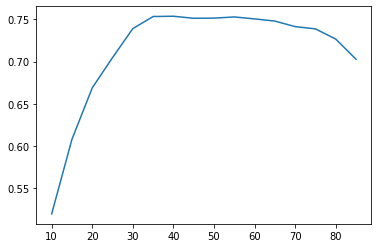

In [32]:
df = btc_df.merge(fng_df, how='inner', on='date')

df = df.set_index('date')

windows = [i for i in range(10, 90, 5)]

corrs = []

for window in windows:

    df['Close_max_window'] = df['Close'].rolling(window=window).max()

    df['Close_indexed'] = df['Close'] / df['Close_max_window']

    corrs.append(df[['Close_indexed', 'value']].corr()['value'][0])


plt.plot(windows, corrs)

# fig, ax = plt.subplots(1, 1, figsize=(12,9))

# # # mpl.plot(
# # #     df,
# # #     type='candle',
# # #     style='classic',
# # #     ax=ax
# # # )

# ax.plot(df['Close_indexed'], color='r')

# # # # ax.xticks = df.index

# ax2 = ax.twinx()

# ax2.plot(df['value'])

# plt.show()

# df

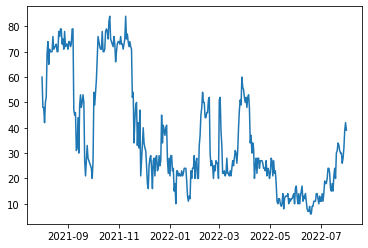

In [84]:
plt.plot(df['value'])